     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9
name
0    5000
1    5000
Name: count, dtype: int64
Train Accuracy: 0.984499990940094
Test Accuracy: 0.9804999828338623


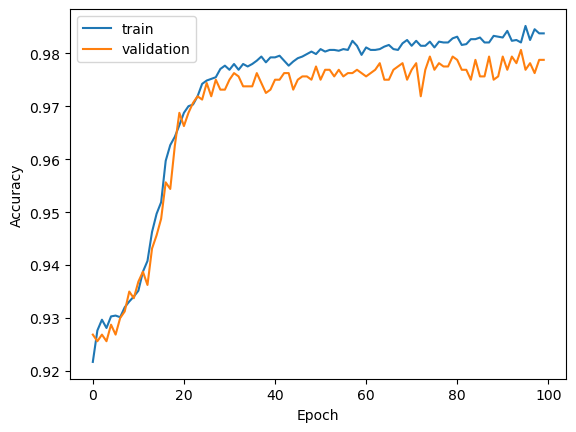

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Передбачено клас grapefruit з достовірністю 98.48%


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Завантаження даних
data = pd.read_csv('citrus.csv')

# Виведення заголовка таблиці (перші 5 записів)
print(data.head())

# Факторизація стовпця 'name'
data['name'] = pd.factorize(data['name'])[0]

# Перевірка балансу класів
print(data['name'].value_counts())

# Створення навчального та тестового наборів
X = data.drop('name', axis=1)
y = data['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Створення нейронної мережі

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компіляція моделі
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Оцінка якості моделі
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Train Accuracy:', train_acc)
print('Test Accuracy:', test_acc)

# Побудова графіку критерію якості
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Тестування моделі на довільному зразку
sample = X_test_scaled[0].reshape(1, -1)
prediction = model.predict(sample)
predicted_class = Y.columns[prediction.argmax()]
predicted_proba = prediction.max() * 100
print(f"\nПередбачено клас {predicted_class} з достовірністю {predicted_proba:.2f}%")